In [736]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime 

In [737]:
df = pd.read_csv('mechanical_fitting_failures_2011_2018-03.csv', parse_dates=True)
df.head()

,DATAFILE_AS_OF,FORM_REV,OPERATOR_ID,REPORT_YEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_TYPE,REPORT_DATE,FILING_DATE,OPERATOR_NAME,...,SECOND_PIPE_MATERIAL_OTHER,SECOND_PIPE_PLASTIC_TEXT,SECOND_PIPE_PLASTIC_OTHER,LEAK_CAUSE_TEXT,LEAK_CAUSE_OTHER,NF_THERMAL_EXP_TEXT,EX_DAMAGE_OCCURRED_TEXT,MAT_WELDS_LEAK_CAUSE_TEXT,LEAK_OCCURRED_TEXT,MFF_NUMBER_FROM_OPERATOR
0,4/3/2018,7100.1-2 10-2014,1209,2018,20180227120985471,85414,INITIAL,3/6/2018,3/6/2018,COLUMBIA GAS OF MASSACHUSETTS,...,NaN,NaN,NaN,OTHER,NOT DETERMINED,NaN,NaN,NaN,LEAKED THROUGH SEAL,00028186
1,4/3/2018,7100.1-2 10-2014,1209,2018,20180219120985470,85413,INITIAL,3/6/2018,3/6/2018,COLUMBIA GAS OF MASSACHUSETTS,...,NaN,POLYETHYLENE (PE),NaN,CORROSION,NaN,NaN,NaN,NaN,LEAKED THROUGH BODY,00028008
2,4/3/2018,7100.1-2 10-2014,1209,2018,20180216120985468,85411,INITIAL,3/6/2018,3/6/2018,COLUMBIA GAS OF MASSACHUSETTS,...,NaN,NaN,NaN,OTHER,NOT DETERMINED,NaN,NaN,NaN,LEAKED THROUGH SEAL,00027950
3,4/3/2018,7100.1-2 10-2014,1209,2018,20180215120985467,85410,INITIAL,3/6/2018,3/6/2018,COLUMBIA GAS OF MASSACHUSETTS,...,NaN,NaN,NaN,OTHER,NOT DETERMINED,NaN,NaN,NaN,LEAKED THROUGH SEAL,00027949
4,4/3/2018,7100.1-2 10-2014,1209,2018,20180215120985466,85409,INITIAL,3/6/2018,3/6/2018,COLUMBIA GAS OF MASSACHUSETTS,...,NaN,NaN,NaN,NATURAL FORCES,NaN,NO,NaN,NaN,LEAKED THROUGH SEAL,00027912


In [738]:
#Explorong Data Structure

print(df.shape)
#print(df.columns)
print(df.info())

(85611, 54)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85611 entries, 0 to 85610
Data columns (total 54 columns):
DATAFILE_AS_OF                   85611 non-null object
FORM_REV                         85611 non-null object
OPERATOR_ID                      85611 non-null int64
REPORT_YEAR                      85611 non-null int64
REPORT_NUMBER                    85611 non-null int64
SUPPLEMENTAL_NUMBER              85611 non-null int64
REPORT_TYPE                      85611 non-null object
REPORT_DATE                      85611 non-null object
FILING_DATE                      85611 non-null object
OPERATOR_NAME                    85611 non-null object
HQ_ADDRESS_STREET                85611 non-null object
HQ_ADDRESS_CITY                  85611 non-null object
HQ_ADDRESS_COUNTY                6266 non-null object
HQ_ADDRESS_STATE                 85611 non-null object
HQ_ADDRESS_ZIP                   85611 non-null object
FAILURE_STATE                    85611 non-null object
FAIL

In [739]:
#Convert date objects in to datetime: 
def convert_todate(dataframe, col):
    '''Converts date objects in to datetime format'''
    
    return pd.to_datetime(dataframe[col])

df['DATAFILE_AS_OF'] = convert_todate(df,'DATAFILE_AS_OF')
df['REPORT_YEAR']    = convert_todate(df,'REPORT_YEAR')
df['REPORT_DATE']    = convert_todate(df,'REPORT_DATE')
df['FILING_DATE']    = convert_todate(df,'FILING_DATE')

In [828]:
#Result:
df[['DATAFILE_AS_OF', 'REPORT_YEAR', 'REPORT_DATE', 'FILING_DATE']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85611 entries, 0 to 85610
Data columns (total 4 columns):
DATAFILE_AS_OF    85611 non-null datetime64[ns]
REPORT_YEAR       85611 non-null datetime64[ns]
REPORT_DATE       85611 non-null datetime64[ns]
FILING_DATE       85611 non-null datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 3.3 MB


In [740]:
#Unique keys in first and second pipe sizes

dict_key_1 =(df['FIRST_PIPE_NOMINAL_SIZE_TEXT'])
dict_key_1=list(set(dict_key_1))

dict_key_2 =(df['SECOND_PIPE_NOMINAL_SIZE_TEXT'])
dict_key_2=list(set(dict_key_2))

print((set(dict_key_1 + dict_key_2)))  

{nan, '6?', '1/2?', '1-3/4?', '4?', '1-1/2?', '1?', '1/4?', '3?', '1-1/4?', '2?', '8? OR LARGER', '3/4?'}


In [741]:
def convert_tostr(dataframe, col):
    print(set(dataframe[col].astype(str)))
    return dataframe[col].astype(str)
    
def convert_tofl(string):
    return string.map({'1-1/2?' : 1.5,
                       '1-1/4?' : 1.25,
                       '1-3/4?' : 1.75,
                       '1/2?' : 0.5,
                       '1/4?' : 0.25,
                       '1?' : 1,
                       '2?' : 2,
                       '3/4?' : 0.75,
                       '3?' : 3,
                       '4?' : 4,
                       '6?' : 6,
                       '8? OR LARGER' : 8,
                       'nan' : np.nan})

#Function Test:
#dict_1 = {'1-1/2?' : 1.5, '1-1/4?' : 1.25, '1-3/4?' : 1.75, '1/2?' : 0.5, '1/4?' : 0.25, '1?' : 1, '2?' : 2, '3/4?' : 0.75, '3?' : 3, '4?' : 4, '6?' : 6, '8? OR LARGER' : 8}
#fist_pipe_size=df_num_1.map(dict_1)



In [742]:
df_pipe_1, df_pipe_2 =convert_tofl(convert_tostr(df,'FIRST_PIPE_NOMINAL_SIZE_TEXT')), convert_tofl(convert_tostr(df,'SECOND_PIPE_NOMINAL_SIZE_TEXT'))
print(df_pipe_1.head(), df_pipe_2.head())

{'6?', '8? OR LARGER', '1/2?', '1-3/4?', '4?', '1-1/2?', '1?', '1/4?', '3?', '2?', '1-1/4?', '3/4?'}
{'6?', '8? OR LARGER', '1/2?', '1-3/4?', 'nan', '4?', '1-1/2?', '1?', '1/4?', '3?', '2?', '1-1/4?', '3/4?'}
0    0.75
1    0.75
2    0.75
3    2.00
4    1.00
Name: FIRST_PIPE_NOMINAL_SIZE_TEXT, dtype: float64 0    0.75
1    0.50
2    0.75
3    2.00
4    1.00
Name: SECOND_PIPE_NOMINAL_SIZE_TEXT, dtype: float64


In [803]:
df['FIRST_PIPE_NOMINAL_SIZE_TEXT'], df['SECOND_PIPE_NOMINAL_SIZE_TEXT']  = df_pipe_1, df_pipe_2  
print('Null Value in 1st Pipe After Conversion:', df['FIRST_PIPE_NOMINAL_SIZE_TEXT'].isnull().sum(), '\n''Null Value in 2nd Pipe After Conversion:', df['SECOND_PIPE_NOMINAL_SIZE_TEXT'].isnull().sum())

Null Value in 1st Pipe After Conversion: 0 
Null Value in 2nd Pipe After Conversion: 297


In [823]:
def impute(dataframe, col):
    """Replace missing values with the mean of column"""
    
    return round(dataframe[col].fillna(dataframe[col].mean()),2)

df['SECOND_PIPE_NOMINAL_SIZE_TEXT'] = impute(df,'SECOND_PIPE_NOMINAL_SIZE_TEXT')

In [827]:
#Result: Impute
df['SECOND_PIPE_NOMINAL_SIZE_TEXT'].isnull().sum()

0

In [829]:
#Any variance in column'FORM_REV'?: 
df['FORM_REV'].value_counts() #Only 1 unique value. Shows no variance. 

print('No Variance in FORM_REV')

No Variance in FORM_REV


In [830]:
#Number of columns > 68% missing values:
plt.figure(figsize = (10,10))
df_null =pd.DataFrame(df.isnull().sum()/df.shape[0]>0.60).reset_index()
df_null.columns = ['col_name', 'null_yes']
i=df_null.col_name[df_null.null_yes==True]
print('68% Columns with Missing Values:', len(i))

68% Columns with Missing Values: 17


<Figure size 720x720 with 0 Axes>

Missing Values, Percentage:
 [(79345, 0.9268084708740699), (71434, 0.83440212122274), (82557, 0.9643270140519326), (77247, 0.9023022742404597), (82683, 0.9657987875389845), (75017, 0.8762542196680333), (84411, 0.9859831096471248), (82845, 0.9676910677366226), (58853, 0.6874467066148042), (85557, 0.9993692399341206), (85274, 0.9960635899592342), (58582, 0.6842812255434465), (85568, 0.9994977280956886), (79267, 0.9258973730011331), (72766, 0.8499608695144315), (83503, 0.9753769959467825), (73060, 0.8533950076508859)]


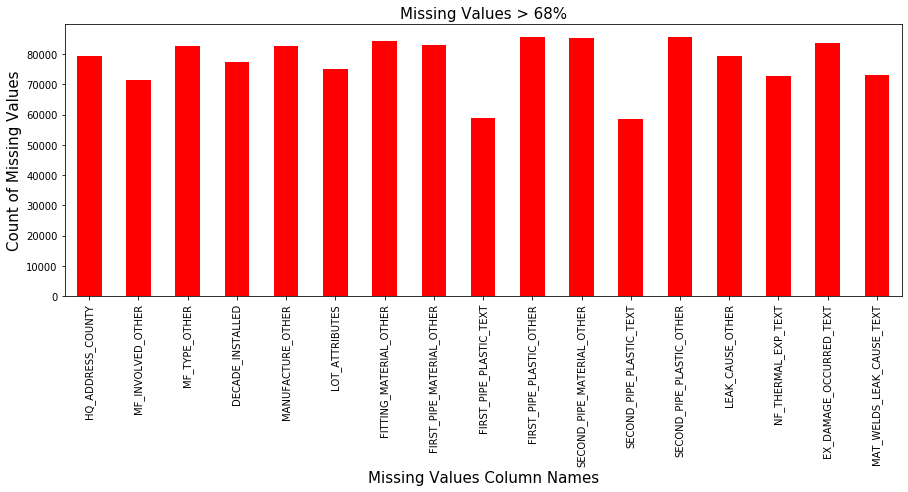

In [831]:
#Plot of missing values: 
print('Missing Values, Percentage:''\n',list(zip(df[i].isnull().sum(),df[i].isnull().sum()/df.shape[0])))
df[i].isnull().sum().plot('bar', figsize = (15,5), color = 'red')
_=plt.xlabel('Missing Values Column Names', fontsize = 15)
_=plt.ylabel('Count of Missing Values', fontsize = 15)
_=plt.title('Missing Values > 68%', fontsize = 15)


In [832]:
# Functions for Exploring Missing Values (Future Use:) 
def missing_values(dataframe):
    """Identifies missing values and Percentage of missing values in the dataframe"""
    
    missing=dataframe.isnull().sum()
    missing_percentage = round(missing/dataframe.shape[0],2)
    return list(zip(missing, missing_percentage))    

def missing_greaterthan_0(missing_values_dataframe):
    """Returns missing values and percentage greater than zero"""
    return [(missing, missing_percentage) for (missing, missing_percentage) in missing_values_dataframe if missing_percentage > 0]
        
def missing_len(dataframe, percentage):
    return len(dataframe.isnull().sum()[(dataframe.isnull().sum()/dataframe.shape[0] > percentage) == True])

def missing_avg(dataframe):
    total_missing_percentage = sum(dataframe.isnull().sum()/dataframe.shape[0])
    length_missing_values = len(dataframe.isnull().sum()[(dataframe.isnull().sum()/dataframe.shape[0] >0) == True])
    return round(total_missing_percentage/length_missing_values,2)
          

In [833]:
print('Missing Values & Percentage:''\n',missing_greaterthan_0(missing_values(df)),
      '\n' '\n' 'Number of Columns with Missing Vlaues:''\n', missing_len(df,0), 
      '\n' '\n' 'Percentage of Missing Values on Average:''\n', missing_avg(df)) 

Missing Values & Percentage:
 [(79345, 0.93), (71434, 0.83), (82557, 0.96), (23332, 0.27), (27187, 0.32), (77247, 0.9), (82683, 0.97), (594, 0.01), (972, 0.01), (75017, 0.88), (84411, 0.99), (82845, 0.97), (58853, 0.69), (85557, 1.0), (85274, 1.0), (58582, 0.68), (85568, 1.0), (79267, 0.93), (72766, 0.85), (83503, 0.98), (73060, 0.85), (11379, 0.13)] 

Number of Columns with Missing Vlaues:
 26 

Percentage of Missing Values on Average:
 0.62


In [835]:
df[i][df[i].notnull() == True].nunique()

HQ_ADDRESS_COUNTY              84
MF_INVOLVED_OTHER             741
MF_TYPE_OTHER                 328
DECADE_INSTALLED               10
MANUFACTURE_OTHER             217
LOT_ATTRIBUTES                738
FITTING_MATERIAL_OTHER         58
FIRST_PIPE_MATERIAL_OTHER      45
FIRST_PIPE_PLASTIC_TEXT         9
FIRST_PIPE_PLASTIC_OTHER       31
SECOND_PIPE_MATERIAL_OTHER     56
SECOND_PIPE_PLASTIC_TEXT        9
SECOND_PIPE_PLASTIC_OTHER      24
LEAK_CAUSE_OTHER              822
NF_THERMAL_EXP_TEXT             2
EX_DAMAGE_OCCURRED_TEXT         2
MAT_WELDS_LEAK_CAUSE_TEXT       2
dtype: int64